### Step 1: Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Step 2: Read the data

In [2]:
url="https://raw.githubusercontent.com/goradbj/MachineLearning/main/Classification/Logistic%20Regression/insurance_data.csv"
df=pd.read_csv(url)

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


### Step 3: Understand, Clean and preprocess the data 

In [4]:
df.shape

(27, 2)

In [5]:
df.size

54

In [6]:
df.columns

Index(['age', 'bought_insurance'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [8]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [9]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

#### Data visulization

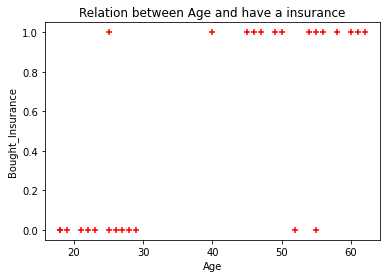

In [10]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
plt.xlabel("Age")
plt.ylabel("Bought_Insurance")
plt.title("Relation between Age and have a insurance")
plt.show()

as from the graph we can understand that, data is not having linear relationship, so we can go for classification

### Step 4: Divide the data

In [11]:
#### Split data into input(X) and target(y)
X=df[['age']]
y=df[['bought_insurance']]

In [12]:
#### Split data for training and testing
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.2)

In [13]:
print(df.shape)
print(X.shape)
print(y.shape)
print(X_tr.shape)
print(y_tr.shape)
print(X_te.shape)
print(y_te.shape)

(27, 2)
(27, 1)
(27, 1)
(21, 1)
(21, 1)
(6, 1)
(6, 1)


### Step 5: Build Model

In [14]:
bimodel=LogisticRegression()
bimodel.fit(X_tr,y_tr)

/home/bjg/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [15]:
# value of m
bimodel.coef_

array([[0.14378347]])

In [16]:
# value of c
bimodel.intercept_

array([-5.05913783])

##### Mathematical model of this example
sig(z)=1/(1+ e^[-(0.119*z-4.7345)])

In [17]:
X_te,y_te

(    age
 19   18
 15   55
 12   27
 3    52
 0    22
 21   26,
     bought_insurance
 19                 0
 15                 1
 12                 0
 3                  0
 0                  0
 21                 0)

### Step 6: Do the Prediction

In [18]:
y_pred=bimodel.predict(X_te)

In [19]:
y_pred

array([0, 1, 0, 1, 0, 0])

In [20]:
bimodel.predict([[60]])

/home/bjg/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [21]:
bimodel.score(X_te,y_te)

0.8333333333333334

### Step 7: Save model for deployment

Model can saved using
1. pickle
2. joblib

#### Pickle

In [23]:
import pickle

In [25]:
# how to save model
pickle.dump(bimodel,open('final_model.sav','wb'))

In [26]:
## how to load model
bimodel1=pickle.load(open("final_model.sav",'rb'))

In [28]:
bimodel1.predict([[7]])

/home/bjg/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

#### joblib

In [29]:
import joblib

In [30]:
# how to save model using joblib
joblib.dump(bimodel1,"final_model2.sav")

['final_model2.sav']

In [31]:
# how to restore the saved model
bimodel3=joblib.load("final_model2.sav")

In [33]:
bimodel3.predict([[93]])

/home/bjg/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])